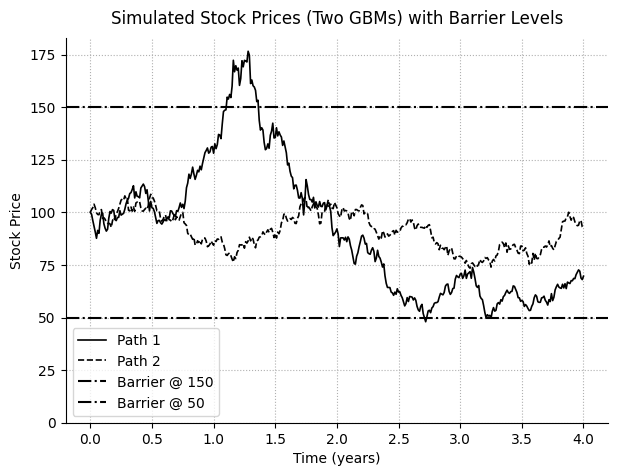

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# -------------------------------
# Parameters
# -------------------------------
T = 4            # total time in years
N = 400          # number of time steps
dt = T / N       # step size
time_points = np.linspace(0, T, N+1)

# Initial prices
S1_0, S2_0 = 100, 100

# Drifts and volatilities for the two paths
mu1, sigma1 = 0.02, 0.30
mu2, sigma2 = 0.00, 0.20

# Barriers
barrier_up = 150
barrier_down = 50

# Create a 'Resimulate' button
button = widgets.Button(description='Resimulate')

def simulate_gbm(S0, mu, sigma, N, dt):
    """
    Simulate a geometric Brownian motion path:
        S_{t+1} = S_t * exp((mu - 0.5*sigma^2)*dt + sigma*sqrt(dt)*Z).
    Returns a NumPy array of length N+1.
    """
    S = np.zeros(N+1)
    S[0] = S0
    for i in range(N):
        Z = np.random.normal()
        S[i+1] = S[i] * np.exp((mu - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z)
    return S

def simulate_and_plot(_):
    """
    Simulate two GBM paths and plot them, 
    with horizontal barriers at barrier_up and barrier_down.
    """
    plt.figure(figsize=(7, 5))
    
    # Simulate path 1
    S1 = simulate_gbm(S1_0, mu1, sigma1, N, dt)
    # Simulate path 2
    S2 = simulate_gbm(S2_0, mu2, sigma2, N, dt)
    
    # Plot the two paths
    plt.plot(time_points, S1, 'k-', label='Path 1', linewidth=1.2)
    plt.plot(time_points, S2, 'k--', label='Path 2', linewidth=1.2)
    
    # Add horizontal barriers
    plt.axhline(barrier_up, color='black', linestyle='-.', label=f'Barrier @ {barrier_up}')
    plt.axhline(barrier_down, color='black', linestyle='-.', label=f'Barrier @ {barrier_down}')

    # Let matplotlib automatically adjust y-axis:
    # We'll just ensure it includes 0 on the lower bound
    ymin, ymax = plt.ylim()
    plt.ylim(bottom=0, top=max(ymax, barrier_up*1.1))
    
    # Labels, legend, grid
    plt.title('Simulated Stock Prices (Two GBMs) with Barrier Levels', pad=10)
    plt.xlabel('Time (years)')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True, linestyle=':')
    
    # Remove top and right spines for style
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.show()

# Hook the button to our simulate_and_plot function
#button.on_click(simulate_and_plot)

# Display the button and run once at startup
#display(button)
simulate_and_plot(None)